# Loading the data

In [1]:
import pandas as pd

df = pd.read_csv("Chronic_Kidney_Disease_data.csv")

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,3,80,1,1,0,1,37.394822,1,11.882429,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,4,40,0,2,0,1,31.329680,0,16.020165,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,5,43,0,1,1,2,23.726311,0,7.944146,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


Function to calculate CKD Stages

In [2]:
def classify_ckd_stage(gfr):
    if gfr >= 90:
        return 1
    elif 60 <= gfr < 90:
        return 2
    elif 45 <= gfr < 60:
        return 3
    elif 30 <= gfr < 45:
        return 3
    elif 15 <= gfr < 30:
        return 4
    else:
        return 5
    
df['CKD_Stage'] = df['GFR'].apply(classify_ckd_stage)

df = df[[col for col in df.columns if col != 'CKD_Stage'] + ['CKD_Stage']]

df.to_csv('updated_CKD_data.csv', index=False)

print(df.head())


   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  DietQuality  ...   Itching  \
0  31.069414        1            5.128112     0.240386  ...  7.556302   
1  29.692119        1           18.609552     6.503233  ...  6.836766   
2  37.394822        1           11.882429     2.104828  ...  2.144722   
3  31.329680        0           16.020165     6.964422  ...  7.077188   
4  23.726311        0            7.944146     3.097796  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0           76.076800

# Data Preprocessing

In [4]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

### One-hot Encoding for ethnicity

The `Ethnicity` column in our dataset is currently represented as numerical categories (0: Caucasian, 1: African American, 2: Asian, 3: Other). Since machine learning models typically perform better with numerical representations that avoid implicit ordering, we apply **one-hot encoding** to transform this column into separate binary variables.

After encoding, four new columns will be created:
- `Ethnicity_Caucasian`: 1 if the patient is Caucasian, otherwise 0.
- `Ethnicity_AfricanAmerican`: 1 if the patient is African American, otherwise 0.
- `Ethnicity_Asian`: 1 if the patient is Asian, otherwise 0.
- `Ethnicity_Other`: 1 if the patient belongs to another ethnicity, otherwise 0.

This transformation ensures that the model does not infer any ordinal relationship between different ethnicities.


In [9]:
df_encoded1 = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity').astype(int)

# Rename columns
df_encoded1 = df_encoded1.rename(columns={
    'Ethnicity_0': 'Ethnicity_Caucasian',
    'Ethnicity_1': 'Ethnicity_AfricanAmerican',
    'Ethnicity_2': 'Ethnicity_Asian',
    'Ethnicity_3': 'Ethnicity_Other'
})

df_encoded1.to_csv("updated_CKD_data1.csv", index=False)

df_encoded1.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


### Label Encoding for Education Level

The `EducationLevel` column represents categorical data with an **inherent order**:
- `0`: None  
- `1`: High School  
- `2`: Bachelor's  
- `3`: Higher  

Since education follows a **hierarchical progression**, **label encoding** replaces each category with its corresponding numeric value, preserving order while keeping the dataset compact.  


In [13]:
df_encoded1['EducationLevel']= df_encoded1['EducationLevel'].astype('category')  #Converts the column to a categorical data type

df_encoded1.to_csv("processed_ckd_data.csv", index=False)

### Standardization of Numerical Features  

To ensure that numerical features with different scales contribute equally to the analysis, we apply **standardization**. This transformation rescales the data so that each feature has a mean of 0 and a standard deviation of 1.  


In [17]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [18]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to normalize
numerical_features = [
    'BMI', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
    'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR',
    'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
    'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
    'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
    'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore',
    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
]

scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded1[numerical_features] = scaler.fit_transform(df_encoded1[numerical_features])

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage
0,1,71,0,0,0,2,31.069414,1,5.128112,0.240386,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,3
1,2,34,0,0,1,3,29.692119,1,18.609552,6.503233,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,3
2,3,80,1,1,0,1,37.394822,1,11.882429,2.104828,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,2
3,4,40,0,2,0,1,31.329680,0,16.020165,6.964422,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,3
4,5,43,0,1,1,2,23.726311,0,7.944146,3.097796,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,3


In [19]:
df_encoded1.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,0.530724,1,-0.772817,-1.589311,-1.453632,...,1,-0.457010,-0.156501,1.512877,1,3,1,0,0,0
1,2,34,0,1,3,0.256520,1,1.475577,0.520585,0.332720,...,0,1.352487,1.241262,0.817624,1,3,1,0,0,0
2,3,80,1,0,1,1.353339,1,0.264903,-0.886012,-1.453632,...,1,-0.457010,0.891822,0.817624,1,2,0,1,0,0
3,4,40,0,0,1,0.530724,0,1.129670,0.520585,-0.262730,...,0,1.352487,-0.505941,0.469998,1,3,0,0,1,0
4,5,43,0,1,2,-0.566095,0,-0.426910,-0.534363,-1.453632,...,1,-1.361758,-0.505941,-1.268135,1,3,0,1,0,0


### **Exploratory Data Analysis (EDA) - Distribution of Numerical Variables**  

This is the process of analyzing and summarizing datasets to understand their main characteristics that helps identify patterns, detect outliers and determine relationships between the variables.

To understand the distribution of key numerical variables, we generate histograms. This helps in:  

- Identifying the shape of the data distribution (normal, skewed, etc.).  
- Detecting potential outliers or unusual patterns.  
- Understanding the spread and range of values for each variable.  

The selected variables include Age, BMI, Serum Creatinine, BUN Levels, GFR, and Protein in Urine, as they are critical indicators in CKD analysis.  

The histograms provide a visual representation of the frequency distribution of each variable.


In [20]:
numerical_features_eda = ['Age', 'BMI', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine']

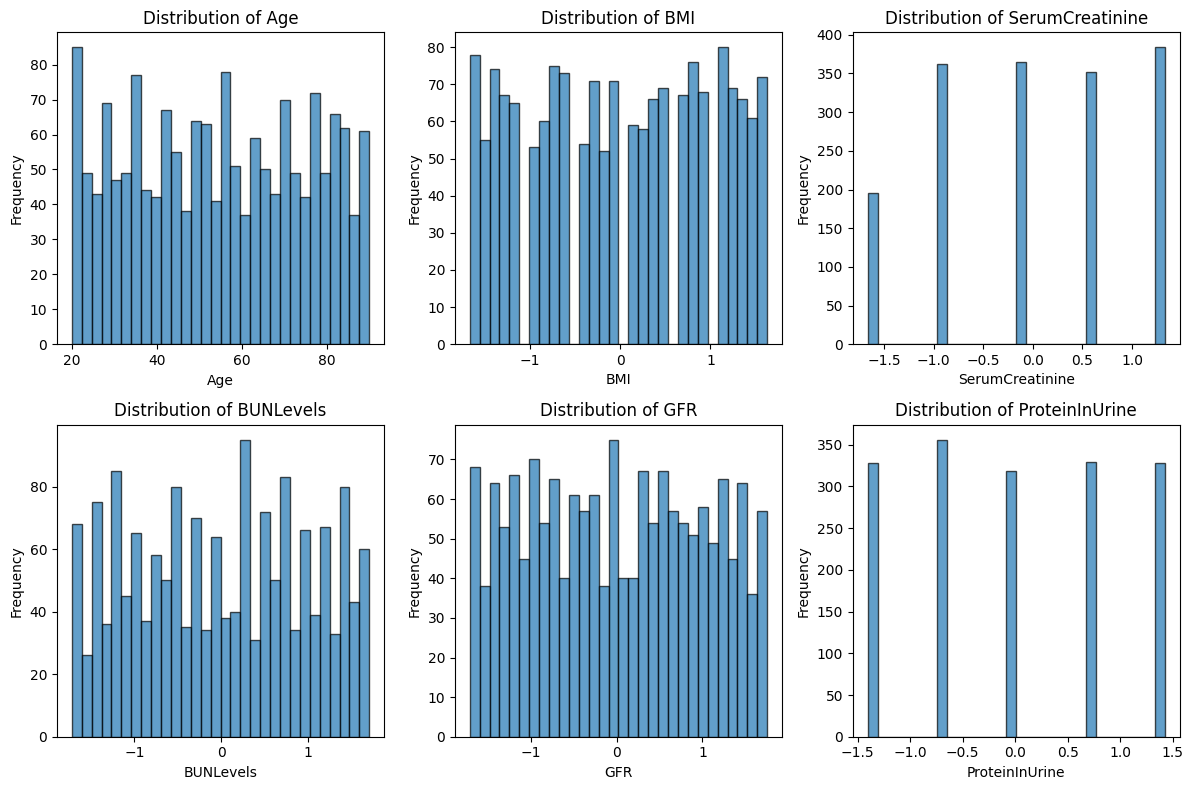

In [23]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features_eda, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_encoded1[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [27]:
df_before = pd.read_csv("updated_CKD_data1.csv")

In [28]:
df_before.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


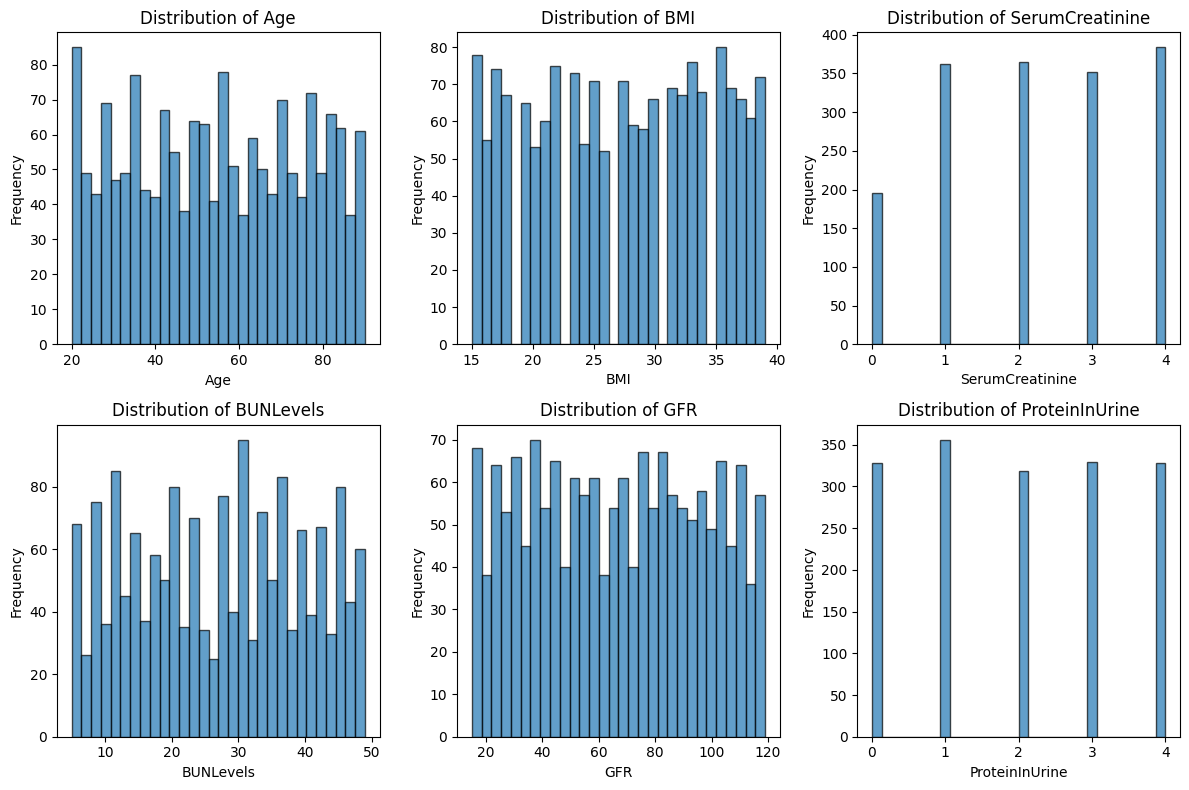

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features_eda, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_before[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

To understand the distribution of key biomarkers, we plotted histograms before and after normalization. The selected biomarkers (GFR, Serum Creatinine, BUN, Protein in Urine, BMI, and Age) are critical indicators of kidney function and CKD progression.

- **GFR (GLomerular Filtration Rate)** - Measures how well the kidneys are filtering blood. Lower GFR indicates kidney damage
- **Serum Creatinine** - Waste product from muscles that is filtered by the kidneys. Increases when kidneys are not filtering well
- **BUN (Blood Urea Nitrogen)** - Measures the amount of nitrogen in urea, a waste product made when the liver breaks down protein. High BUN suggests reduced kidney function.
-  **Protein in Urine** - Healthy kidneys prevent proteins from leaking into urine. If protein is found in urine, it may indicate kidney damage.
- **BMI** - High BMI is linked to higher CKD risk as obesity can increase blood pressure and diabetes risk and low BMI may indicate malnutrition in advanced CKD

After normalization, some values became negative due to Z-score transformation, which centers data around 0 but does not affect the data's distribution but changes its scale. The histograms confirm that normalization preserved the original shape of the data while adjusting the scale for further analysis.

Detecting outliers

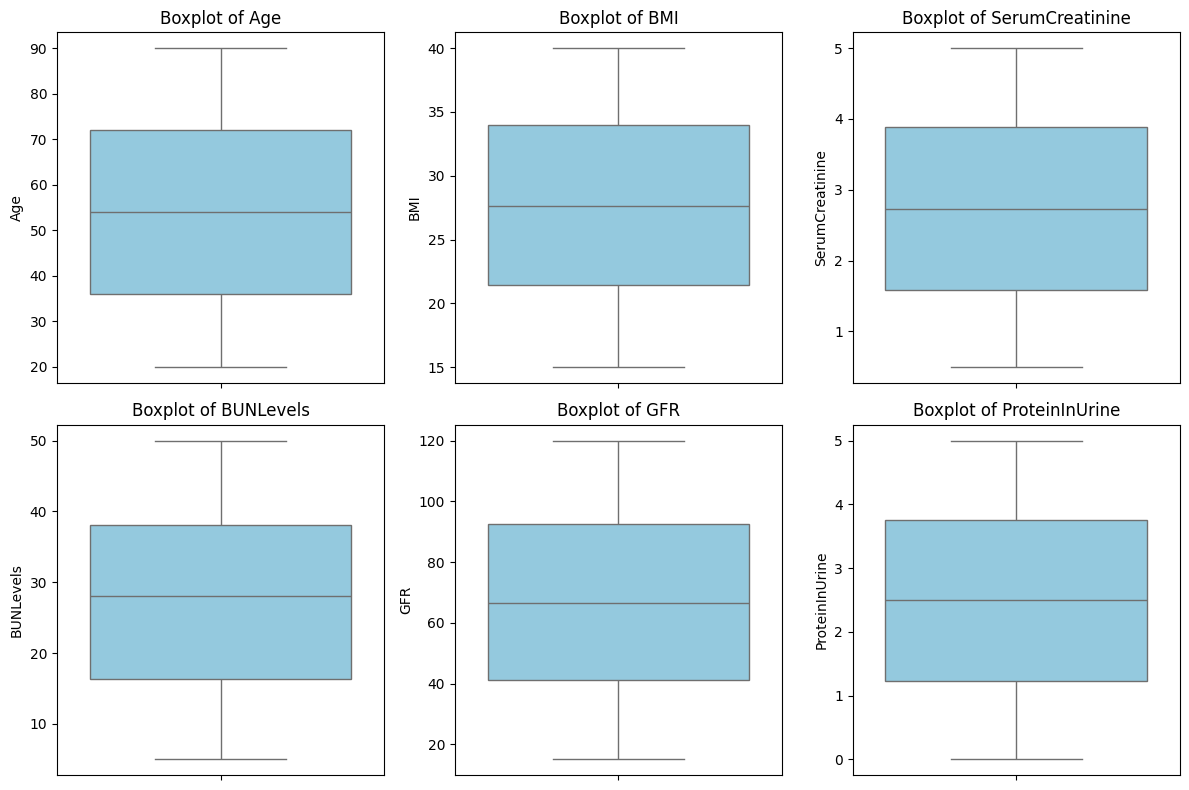

In [30]:
# Define the biomarkers for boxplot analysis
biomarkers = ["Age", "BMI", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine"]

# Set up the figure size
plt.figure(figsize=(12, 8))

# Loop through biomarkers to create boxplots
for i, col in enumerate(biomarkers, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

1. **No Significant Outliers**  
   - There are no extreme points outside the whiskers, indicating that the dataset does not contain obvious outliers for these biomarkers.  
   - This suggests **clean data** with no extreme deviations that might require special handling.  

2. **Data Spread and Variability**  
   - The **Interquartile Range (IQR)** represents the spread of the middle 50% of the data.  
   - **Serum Creatinine and Protein in Urine** have relatively smaller ranges, while **GFR and BUN Levels** show a wider distribution.  

3. **Median and Symmetry**  
   - The **medians (horizontal lines inside the boxes)** are mostly centered, suggesting fairly symmetric distributions.  
   - If the median was skewed toward the top or bottom, it would indicate a skewed distribution.  


Correlation Heatmap Analysis

To visually represent the relationships between the variable. Helps identify patterns, dependencies or highly correlated features

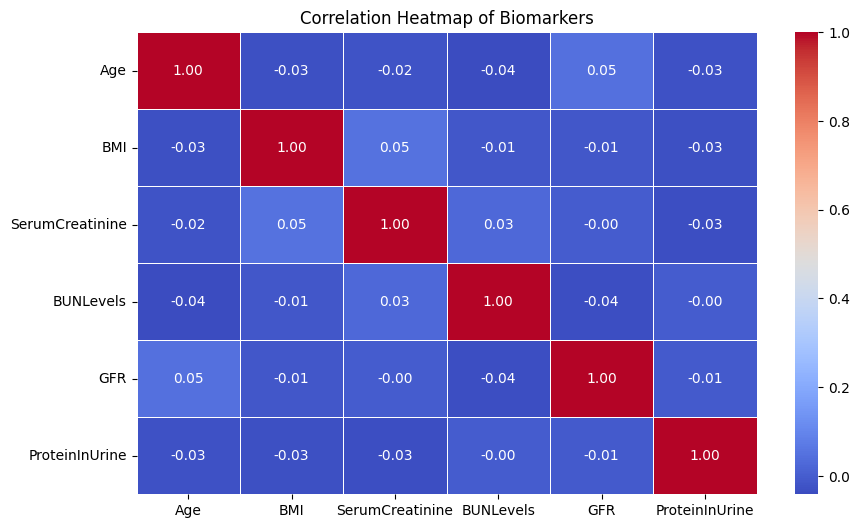

In [31]:
# Compute the correlation matrix
corr_matrix = df_encoded1[biomarkers].corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Biomarkers")

# Show plot
plt.show()


In [32]:
df_encoded1.columns

Index(['PatientID', 'Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency

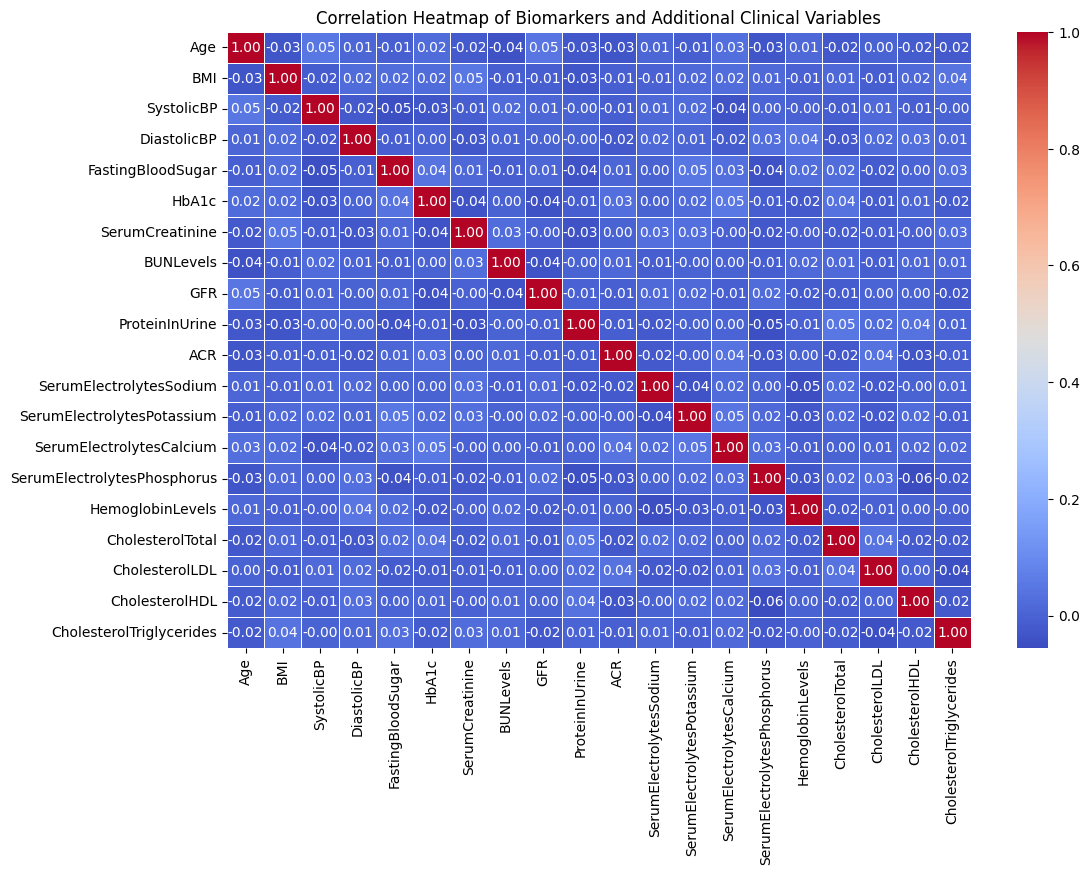

In [33]:
updated_biomarkers = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
    'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR',
    'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
    'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
    'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides'
]

# Compute correlation matrix
corr_matrix = df_encoded1[updated_biomarkers].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Biomarkers and Additional Clinical Variables")
plt.show()


Weak Correlations
- Most variables exhibit weak correlations (close to 0), indicating low linear relationships.
- This suggests that simple linear associations may not fully capture the interactions between biomarkers and clinical variables.

Notable Correlations
- **SystolicBP and DiastolicBP**: As expected, they show a strong correlation (~1.00), since both measure blood pressure.
- **SerumCreatinine and GFR**: There is a mild inverse correlation, which aligns with the biological expectation that increased creatinine is associated with decreased kidney filtration efficiency.
- **Protein in Urine and ACR**: A stronger relationship is expected here, as both are indicators of kidney damage.
- **Cholesterol Levels**: LDL, Total Cholesterol, and Triglycerides show moderate positive correlations, which is consistent with their role in lipid metabolism.

Next Steps
- **Feature Selection**: Since correlations are weak, we may need advanced methods such as Principal Component Analysis (PCA) or feature engineering to determine the most relevant variables.
- **Stratified Analysis**: Examining correlations within different CKD stages or demographic groups could provide deeper insights into variable relationships.



CKD Prevelance Analysis

C:\Users\glori\AppData\Local\Temp\ipykernel_27804\2595767458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded1, x='CKD_Stage', palette='Blues')


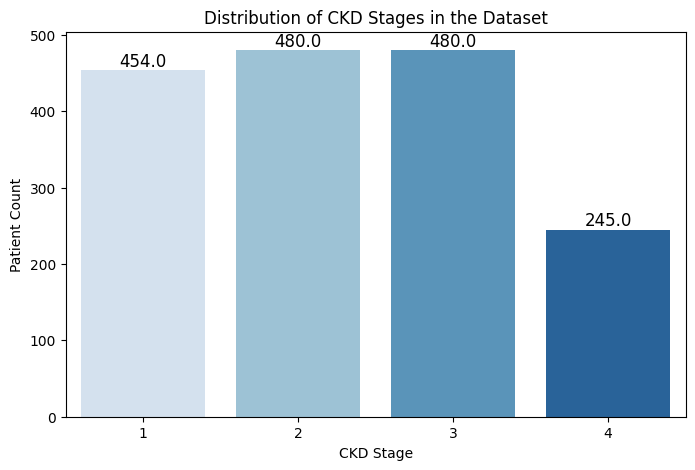

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded1, x='CKD_Stage', palette='Blues')

plt.xlabel('CKD Stage')
plt.ylabel('Patient Count')
plt.title('Distribution of CKD Stages in the Dataset')

# Show values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=12)

plt.show()

C:\Users\glori\AppData\Local\Temp\ipykernel_27804\1243554152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded1['CKD_Stage'], y=df[biomarker], palette='Blues')
C:\Users\glori\AppData\Local\Temp\ipykernel_27804\1243554152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded1['CKD_Stage'], y=df[biomarker], palette='Blues')
C:\Users\glori\AppData\Local\Temp\ipykernel_27804\1243554152.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_encoded1['CKD_Stage'], y=df[biomarker], palette='Blues')
C:\Users\glori\AppD

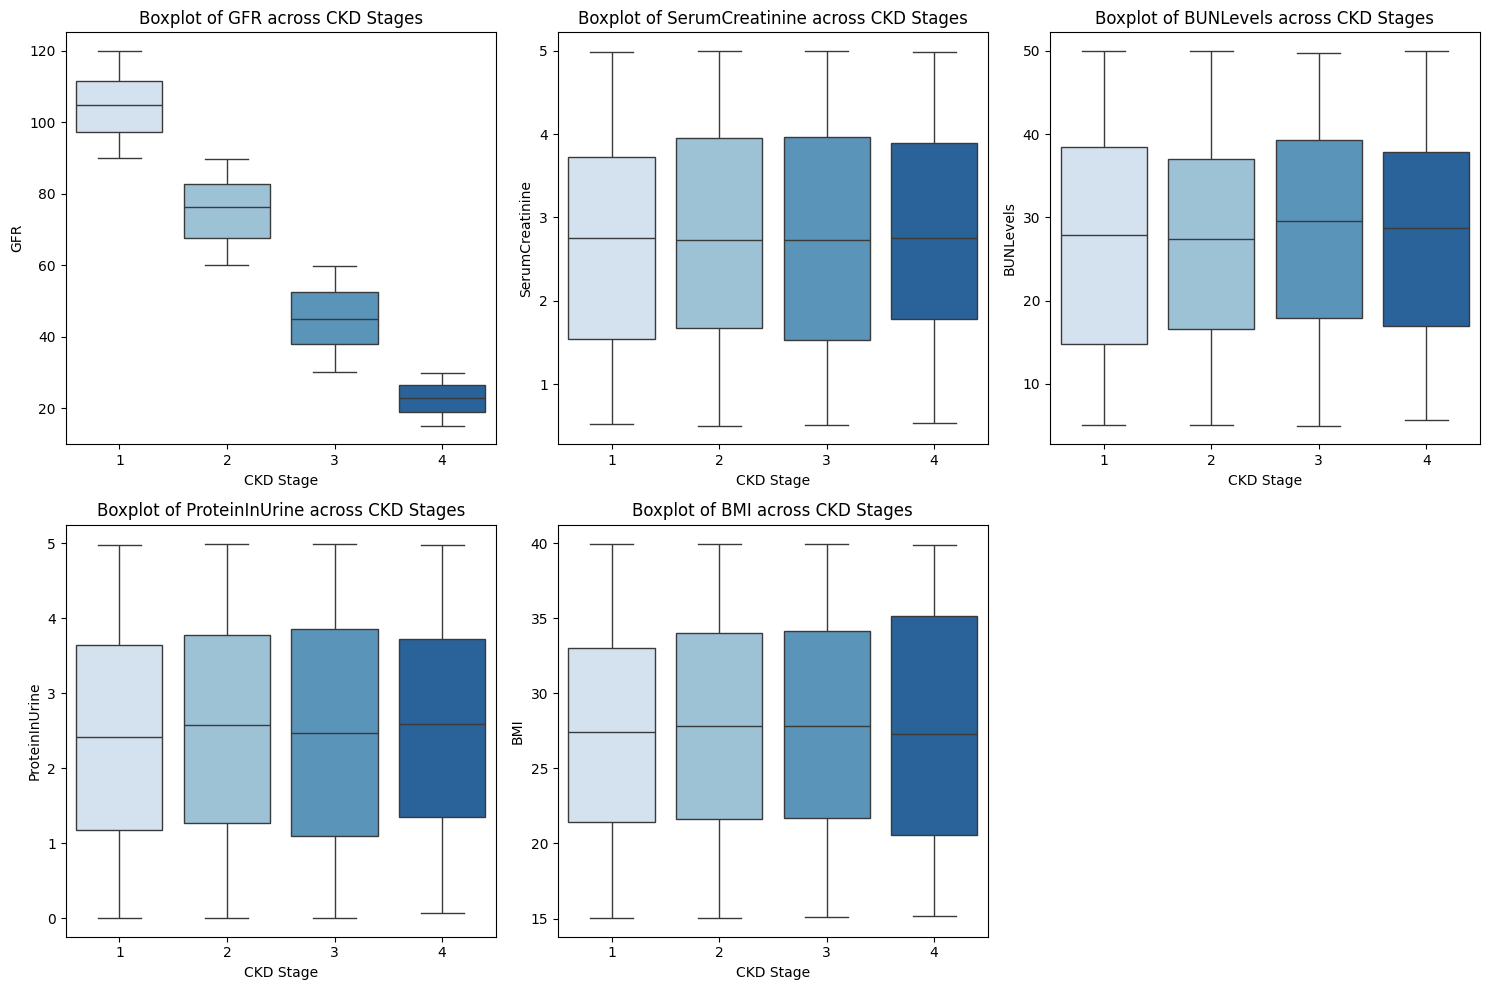

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of biomarkers to plot
biomarkers = ['GFR', 'SerumCreatinine', 'BUNLevels', 'ProteinInUrine', 'BMI']

# Set figure size
plt.figure(figsize=(15, 10))

# Create subplots
for i, biomarker in enumerate(biomarkers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_encoded1['CKD_Stage'], y=df[biomarker], palette='Blues')
    plt.title(f'Boxplot of {biomarker} across CKD Stages')
    plt.xlabel('CKD Stage')
    plt.ylabel(biomarker)

# Adjust layout
plt.tight_layout()
plt.show()


In [36]:
import scipy.stats as stats

# Selecting numerical biomarkers for testing
biomarkers = ["GFR", "SerumCreatinine", "BUNLevels", "ProteinInUrine", "BMI"]
ckd_stage_col = "CKD_Stage"

# Conduct normality tests (Shapiro-Wilk)
print("### Normality Test (Shapiro-Wilk) ###")
for biomarker in biomarkers:
    for stage in df_encoded1[ckd_stage_col].unique():
        data = df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna()
        stat, p = stats.shapiro(data)
        print(f"{biomarker} - CKD Stage {stage}: p-value = {p:.5f}")

# Levene’s test for variance homogeneity
print("\n### Levene’s Test for Equal Variance ###")
for biomarker in biomarkers:
    groups = [df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna() for stage in df_encoded1[ckd_stage_col].unique()]
    stat, p = stats.levene(*groups)
    print(f"{biomarker}: p-value = {p:.5f}")

# ANOVA or Kruskal-Wallis test based on normality results
print("\n### Group Comparisons Across CKD Stages ###")
for biomarker in biomarkers:
    groups = [df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna() for stage in df_encoded1[ckd_stage_col].unique()]
    
    # Use ANOVA if all groups pass normality, otherwise use Kruskal-Wallis
    normality_pass = all(stats.shapiro(group)[1] > 0.05 for group in groups)
    if normality_pass:
        stat, p = stats.f_oneway(*groups)
        print(f"{biomarker}: ANOVA p-value = {p:.5f}")
    else:
        stat, p = stats.kruskal(*groups)
        print(f"{biomarker}: Kruskal-Wallis p-value = {p:.5f}")

# Chi-Square Test for categorical variables
categorical_vars = ["Smoking", "AlcoholConsumption", "FamilyHistoryKidneyDisease"]
print("\n### Chi-Square Test for Categorical Variables ###")
for var in categorical_vars:
    contingency_table = pd.crosstab(df_encoded1[var], df_encoded1[ckd_stage_col])
    stat, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"{var}: Chi-Square p-value = {p:.5f}")


### Normality Test (Shapiro-Wilk) ###
GFR - CKD Stage 3: p-value = 0.00000
GFR - CKD Stage 2: p-value = 0.00000
GFR - CKD Stage 1: p-value = 0.00000
GFR - CKD Stage 4: p-value = 0.00000
SerumCreatinine - CKD Stage 3: p-value = 0.00000
SerumCreatinine - CKD Stage 2: p-value = 0.00000
SerumCreatinine - CKD Stage 1: p-value = 0.00000
SerumCreatinine - CKD Stage 4: p-value = 0.00000
BUNLevels - CKD Stage 3: p-value = 0.00000
BUNLevels - CKD Stage 2: p-value = 0.00000
BUNLevels - CKD Stage 1: p-value = 0.00000
BUNLevels - CKD Stage 4: p-value = 0.00000
ProteinInUrine - CKD Stage 3: p-value = 0.00000
ProteinInUrine - CKD Stage 2: p-value = 0.00000
ProteinInUrine - CKD Stage 1: p-value = 0.00000
ProteinInUrine - CKD Stage 4: p-value = 0.00000
BMI - CKD Stage 3: p-value = 0.00000
BMI - CKD Stage 2: p-value = 0.00000
BMI - CKD Stage 1: p-value = 0.00000
BMI - CKD Stage 4: p-value = 0.00000

### Levene’s Test for Equal Variance ###
GFR: p-value = 0.00000
SerumCreatinine: p-value = 0.12265
BUNLev

# **Feature Engineering**

1. Handling Skewed Data (Non-Normal Distributions)
Many clinical variables (e.g., GFR, SerumCreatinine, BUNLevels) do not follow a normal distribution. Since our normality tests confirmed non-normality, we apply transformations:

Log Transformation: Applied to variables with highly skewed distributions to reduce variance and improve model performance.

Alternative Transformations: Box-Cox (for positive values) or Yeo-Johnson (for mixed positive/negative values)





In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
df_fe = pd.read_csv("updated_CKD_data1.csv")

df_fe.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


In [59]:
# Drop insignificant columns
drop_cols = ["PatientID", "Diagnosis"]
df_fe = df_fe.drop(columns=[col for col in drop_cols if col in df_fe.columns])
df_fe.head()

,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,71,0,0,2,31,1,5,0,4,0,...,0,1,1,4,9,3,1,0,0,0
1,34,0,1,3,29,1,18,6,7,1,...,0,0,3,8,7,3,1,0,0,0
2,80,1,0,1,37,1,11,2,4,0,...,1,1,1,7,7,2,0,1,0,0
3,40,0,0,1,31,0,16,6,6,0,...,0,0,3,3,6,3,0,0,1,0
4,43,0,1,2,23,0,7,3,4,0,...,0,1,0,3,1,3,0,1,0,0


In [60]:
# Encode categorical variables
categorical_cols = ["Gender", "EducationLevel"]

df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

In [61]:
# Generate new features
df_fe["BUN_Creatinine_Ratio"] = df_fe["BUNLevels"] / (df_fe["SerumCreatinine"] + 1e-8)
df_fe["Protein_GFR_Ratio"] = df_fe["ProteinInUrine"] / df_fe["GFR"]
df_fe["PulsePressure"] = df_fe["SystolicBP"] - df_fe["DiastolicBP"]
df_fe["LDL_HDL_Ratio"] = df_fe["CholesterolLDL"] / df_fe["CholesterolHDL"]

df_fe.head()

,Age,SocioeconomicStatus,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,...,Ethnicity_Asian,Ethnicity_Other,Gender_1,EducationLevel_1,EducationLevel_2,EducationLevel_3,BUN_Creatinine_Ratio,Protein_GFR_Ratio,PulsePressure,LDL_HDL_Ratio
0,71,0,31,1,5,0,4,0,0,0,...,0,0,False,False,True,False,6.250000,0.000000,30,4.047619
1,34,1,29,1,18,6,7,1,1,0,...,0,0,False,False,False,True,10.333333,0.054545,53,0.988506
2,80,0,37,1,11,2,4,0,0,0,...,0,0,True,True,False,False,13.000000,0.014925,41,6.600000
3,40,0,31,0,16,6,6,0,0,0,...,1,0,False,True,False,False,10.500000,0.090909,52,1.603448
4,43,1,23,0,7,3,4,0,0,0,...,0,0,False,False,True,False,4.000000,0.035714,32,8.142857


In [62]:
import numpy as np

num_features = ["Age", "BMI", "SystolicBP", "DiastolicBP", "FastingBloodSugar",
                "HbA1c", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine",
                "ACR", "SerumElectrolytesSodium", "SerumElectrolytesPotassium",
                "SerumElectrolytesCalcium", "SerumElectrolytesPhosphorus", 
                "HemoglobinLevels", "CholesterolTotal", "CholesterolLDL", 
                "CholesterolHDL", "CholesterolTriglycerides", "FatigueLevels",
                "NauseaVomiting", "MuscleCramps", "Itching", "QualityOfLifeScore",
                "BUN_Creatinine_Ratio", "Protein_GFR_Ratio", "PulsePressure", "LDL_HDL_Ratio"]


# Check for NaN values
print("Missing values:\n", df_fe[num_features].isnull().sum())

# Check for Infinite values
print("Infinite values:\n", np.isinf(df_fe[num_features]).sum())


Missing values:
 Age                            0
BMI                            0
SystolicBP                     0
DiastolicBP                    0
FastingBloodSugar              0
HbA1c                          0
SerumCreatinine                0
BUNLevels                      0
GFR                            0
ProteinInUrine                 0
ACR                            0
SerumElectrolytesSodium        0
SerumElectrolytesPotassium     0
SerumElectrolytesCalcium       0
SerumElectrolytesPhosphorus    0
HemoglobinLevels               0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
FatigueLevels                  0
NauseaVomiting                 0
MuscleCramps                   0
Itching                        0
QualityOfLifeScore             0
BUN_Creatinine_Ratio           0
Protein_GFR_Ratio              0
PulsePressure                  0
LDL_HDL_Ratio                  0
dtype: int64
Infinite valu

In [63]:
# standardize numerical features
num_features = ["Age", "BMI", "SystolicBP", "DiastolicBP", "FastingBloodSugar",
                "HbA1c", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine",
                "ACR", "SerumElectrolytesSodium", "SerumElectrolytesPotassium",
                "SerumElectrolytesCalcium", "SerumElectrolytesPhosphorus", 
                "HemoglobinLevels", "CholesterolTotal", "CholesterolLDL", 
                "CholesterolHDL", "CholesterolTriglycerides", "FatigueLevels",
                "NauseaVomiting", "MuscleCramps", "Itching", "QualityOfLifeScore",
                "BUN_Creatinine_Ratio", "Protein_GFR_Ratio", "PulsePressure", "LDL_HDL_Ratio"]

scaler = StandardScaler()
df_fe[num_features] = scaler.fit_transform(df_fe[num_features])


**Feature selection using Principal Component Analysis**

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining the most important information

In [64]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_fe)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [65]:
df_pca.head()

,PC1,PC2
0,-4.450427,0.492093
1,8.473641,3.900915
2,1.530497,1.617823
3,6.476658,-0.752665
4,-2.404861,-0.105386


In [66]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

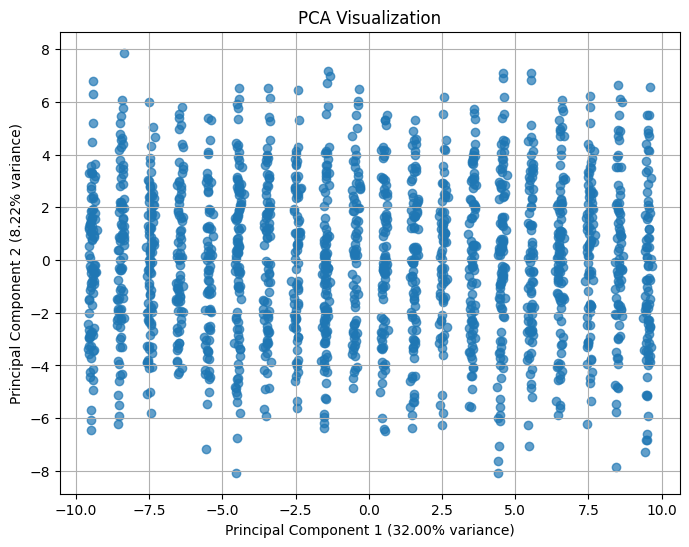

In [67]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()

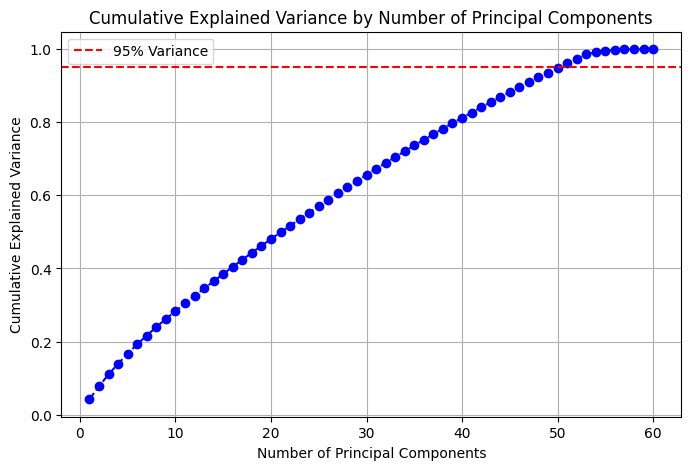

In [68]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fe)  # Reusing the same features

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.grid(True)

# Show threshold line at 95% variance explained
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()

plt.show()


Number of principal components needed for 95% variance: 51


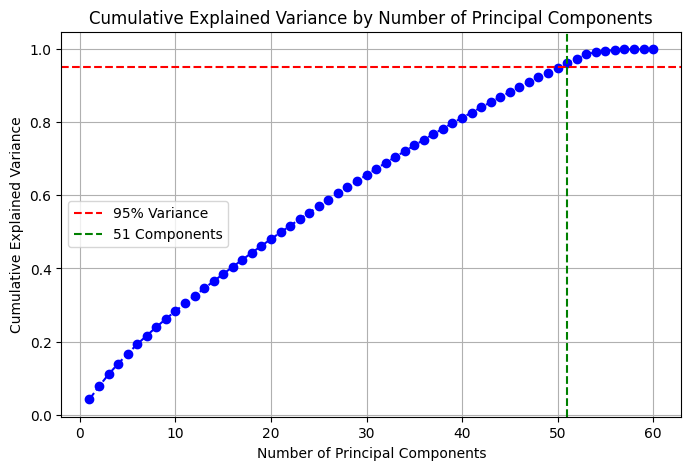

In [69]:
# Perform PCA
pca1 = PCA()
pca.fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of principal components needed for 95% variance: {num_components_95}")

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.grid(True)

# Show threshold line at 95% variance explained
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"{num_components_95} Components")
plt.legend()

plt.show()


In [70]:
# Apply PCA with the selected number of components
pca_optimal = PCA(n_components=num_components_95)
df_pca_reduced = pca_optimal.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_reduced = pd.DataFrame(df_pca_reduced, columns=[f'PC{i+1}' for i in range(num_components_95)])

# Display first few rows
df_pca_reduced.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
0,0.166724,0.013175,1.300233,1.101287,-0.859034,1.774935,-1.675053,0.046937,0.146701,-1.283580,...,0.011125,0.879797,0.098357,1.394696,1.561303,2.574026,0.481406,-0.023900,0.629840,-0.868230
1,0.820155,0.055993,-1.966507,0.906165,-0.665648,-1.217769,-0.265565,1.703373,-1.848417,-0.505819,...,0.231377,-1.161956,0.177238,1.321488,0.329323,-0.001689,0.214977,-1.621276,0.949327,0.411985
2,-0.619392,0.036650,3.200011,-2.313177,-0.624210,-1.335067,-0.225181,-1.130725,1.334090,-1.238150,...,1.153825,0.268107,-0.990924,1.023396,2.796354,0.045283,1.401941,1.426665,0.485565,-0.377298
3,1.744661,-0.532298,-0.646629,-1.428606,-0.923850,-1.676638,-0.461037,-0.077013,-1.419839,1.509375,...,-0.738753,-0.239002,0.732015,0.910742,1.342797,0.316553,-0.672208,1.154045,-0.353730,-0.680031
4,0.809960,0.501183,3.938615,-1.471911,-0.141767,2.008763,0.721002,-0.754903,-0.245780,-1.875657,...,0.368638,-0.153992,1.116969,-1.258419,0.647201,0.071102,0.947240,-1.822566,1.963972,0.133869


In [71]:
df_pca_reduced.shape

(1659, 51)